<a href="https://colab.research.google.com/github/disha2sinha/CropYield-prediction/blob/master/CropPrediction(Mysore)_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset(Bangalore rural District)

In [0]:
from google.colab import files
uploaded=files.upload()

Saving mysore.csv to mysore.csv


In [0]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['mysore.csv']))
df.rename(columns={'vapour_pressure area':'vapour_pressure','Unnamed: 6':'area'},inplace=True)
df

,year,percipitation,min_temp,cloud_cover,vapour_pressure,production,area
0,1990,1990.784,25.213167,49.167833,24.307333,3382,3896
1,1991,2764.749,25.305750,49.171750,24.401583,3108,4119
2,1992,3132.967,25.070167,49.171750,24.152083,3266,4431
3,1993,2493.423,25.198750,49.171750,24.242833,3803,4582
4,1994,2509.262,25.166417,49.171750,24.172000,3353,5145
5,1995,2542.588,25.463500,49.171750,24.521500,3686,4046
6,1996,3007.996,25.419500,51.822833,24.462333,3553,5464
7,1997,2884.676,25.638083,50.535083,24.483167,3149,4201
8,1998,3595.758,25.828167,51.245500,24.794917,3429,4968
9,1999,2380.598,25.304583,50.215667,24.181250,3258,4006


### Showing correlation between dependent and independent variables

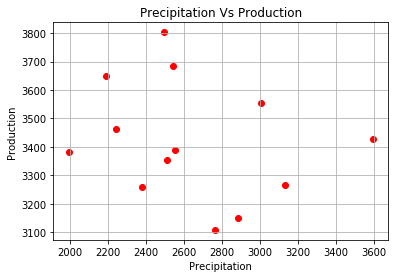

In [0]:
plt.scatter(df['percipitation'],df['production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

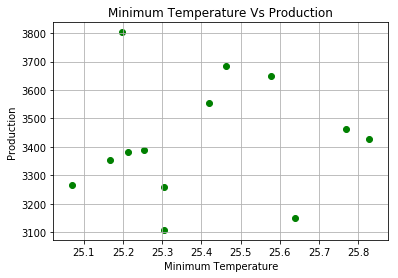

In [0]:
plt.scatter(df['min_temp'],df['production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

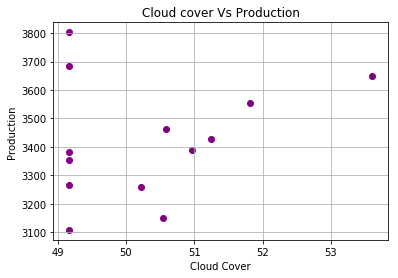

In [0]:
plt.scatter(df['cloud_cover'],df['production'],color="purple")
plt.title("Cloud cover Vs Production")
plt.xlabel("Cloud Cover")
plt.ylabel("Production")
plt.grid()
plt.show()

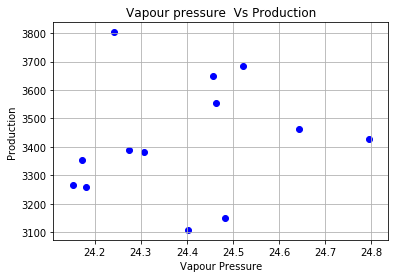

In [0]:
plt.scatter(df['vapour_pressure'],df['production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()

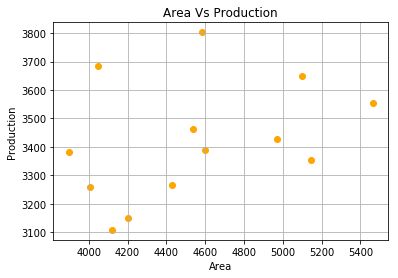

In [0]:
plt.scatter(df['area'],df['production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

## Regression :

In [0]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [0]:

X = df[['percipitation'	,'min_temp'	,'cloud_cover'	,'vapour_pressure'	,'area']] 
Y = df['production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')

Predicted Production: [3099.74569237 3302.77222086 3281.30655638] 


Coefficients:  [-2.59718652e-01 -7.88889023e+02  5.21626663e+01  1.36547588e+03
  9.56692968e-02] 


R-squared score:  -0.7033709850476237 



**ROW-wise Regression**

In [0]:
predicted_production=[]
actual_production=[]
errors=[]
for i in df.index.values:
  A_test=df.iloc[df.index==i].drop(['production'],axis=1)
  b_test=df.iloc[df.index==i]['production']
  A_train=df.drop(['production'],axis=1).drop([i],axis=0)
  b_train=df.drop([i])['production']
  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  actual_production.append(b_test.get_values()[0])
  predicted_production.append(b_pred[0])
  
for i in range(len(predicted_production)):
  errors.append(actual_production[i]-predicted_production[i])

year=1990
for i in range(len(predicted_production)):
  print('Year: ',year,'- Actual production: ',[actual_production[i]],', Predicted production: ',[predicted_production[i]],', Error: ',[errors[i]])
  year+=1

Year:  1990 - Actual production:  [3382] , Predicted production:  [3578.2688774479684] , Error:  [-196.2688774479684]
Year:  1991 - Actual production:  [3108] , Predicted production:  [3464.7005887688974] , Error:  [-356.70058876889743]
Year:  1992 - Actual production:  [3266] , Predicted production:  [3229.2286673778435] , Error:  [36.77133262215648]
Year:  1993 - Actual production:  [3803] , Predicted production:  [3343.280718515256] , Error:  [459.719281484744]
Year:  1994 - Actual production:  [3353] , Predicted production:  [3877.187912911015] , Error:  [-524.1879129110148]
Year:  1995 - Actual production:  [3686] , Predicted production:  [3330.7367471734524] , Error:  [355.2632528265476]
Year:  1996 - Actual production:  [3553] , Predicted production:  [3582.248825294264] , Error:  [-29.248825294263952]
Year:  1997 - Actual production:  [3149] , Predicted production:  [3220.456151303595] , Error:  [-71.4561513035951]
Year:  1998 - Actual production:  [3429] , Predicted production

**Calculating RMS error**

In [0]:
import math
sum_error=0
for i in range(len(predicted_production)):
  diff=actual_production[i]-predicted_production[i]
  pow_diff=math.pow(diff,2)
  sum_error=sum_error+pow_diff
root_error=math.sqrt(sum_error)
rms_error=root_error/len(predicted_production)
print('\nRoot Mean Square error: ',rms_error,'\n')


Root Mean Square error:  80.60756757622197 

